In [1]:
%load_ext autoreload
%autoreload 2

from utils.preprocessing import create_time_matrix, create_caregivers_df, create_tasks_df, create_clients_df, create_continuity_df

caregivers = create_caregivers_df('data/raw/caregivers.csv')

tasks = create_tasks_df('data/raw/hemtjanst_tasks.csv', only_client_tasks=True)

clients = create_clients_df('data/raw/clients.csv')

drive_time_matrix = create_time_matrix('data/raw/duration_matrix_DRIVE.csv')
walk_time_matrix = create_time_matrix('data/raw/duration_matrix_WALK.csv')
bicycle_time_matrix = create_time_matrix('data/raw/duration_matrix_BICYCLE.csv')

continuity = create_continuity_df('data/raw/continuity.csv')

In [2]:
# Test1: Subset with only caregivers 33, 949, 1108 and their tasks
test1_subset = [33, 949, 1108]
test_caregivers = caregivers.loc[test1_subset]
test_tasks = tasks[tasks['PlannedCaregiverID'].isin(test1_subset)]
small_test = (test_caregivers, test_tasks)

# Test2: Subset with only first 10 caregivers that use car as mode of transport
car_caregivers = caregivers[caregivers['ModeOfTransport'] == 'car']
car_tasks = tasks[tasks['PlannedCaregiverID'].isin(car_caregivers.index)]
car_test = (car_caregivers, car_tasks)

full_test = (caregivers, tasks)

In [7]:
from models.fixed_model import FixedModel
from models.tsp_model import TSPModel
model_type = TSPModel
model_caregivers, model_tasks = full_test

model = model_type(model_caregivers, model_tasks, clients, drive_time_matrix, walk_time_matrix, bicycle_time_matrix, continuity)
model.build(
        # caregiver_penalty=0,
        # overtime_penalty=0,
        worktime_per_break=0,
        continuity_penalty=0,
        # warm_start=True
)

Building TSP model.
Created base variables.
Built base model.
Adding overtime penalties.
Adding caregiver usage penalties.
Updated objective function with penalties.


<gurobi.Model Continuous instance HomeCare: 0 constrs, 0 vars, Parameter changes: Username=(user-defined), LicenseID=2635249>

In [9]:
model.optimize()

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (mac64[arm] - Darwin 24.3.0 24D70)



CPU model: Apple M2 Pro
Thread count: 10 physical cores, 10 logical processors, using up to 10 threads

Optimize a model with 11185 rows, 3623520 columns and 14603696 nonzeros
Model fingerprint: 0xda23e09d
Variable types: 64 continuous, 3623456 integer (3623456 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+03]
  Objective range  [1e+00, 6e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+02]

Interrupt request received
Presolved: 10778 rows, 3364878 columns, 13428286 nonzeros

Continuing optimization...


Explored 1 nodes (132365 simplex iterations) in 3.51 seconds (1.84 work units)
Thread count was 10 (of 10 available processors)

Solution count 5: 18241.9 18566.5 18684.5 ... 20739.2

Solve interrupted
Best objective 1.824193333333e+04, best bound 1.513374644348e+04, gap 17.0387%


<gurobi.Model MIP instance HomeCare: 11185 constrs, 3623520 vars, Parameter changes: Username=(user-defined), LicenseID=2635249>

Model not optimally solved. Status: 11
  Total time: 406.67, Accounted time: 418.57
  Service: 320.00, Travel: 81.45, Waiting: 17.12, Break: 0.00
  Total time: 624.18, Accounted time: 625.28
  Service: 500.00, Travel: 89.27, Waiting: 36.02, Break: 0.00
  Total time: 360.30, Accounted time: 370.80
  Service: 260.00, Travel: 68.23, Waiting: 42.57, Break: 0.00
  Total time: 508.90, Accounted time: 514.20
  Service: 330.00, Travel: 132.95, Waiting: 51.25, Break: 0.00
  Total time: 920.48, Accounted time: 923.07
  Service: 690.00, Travel: 140.72, Waiting: 92.35, Break: 0.00
  Total time: 502.43, Accounted time: 507.52
  Service: 385.00, Travel: 70.80, Waiting: 51.72, Break: 0.00
  Total time: 495.45, Accounted time: 498.20
  Service: 330.00, Travel: 98.82, Waiting: 69.38, Break: 0.00
  Total time: 399.58, Accounted time: 407.97
  Service: 305.00, Travel: 56.95, Waiting: 46.02, Break: 0.00
  Total time: 310.03, Accounted time: 324.25
  Service: 265.00, Travel: 39.87, Waiting: 19.38, Break: 0

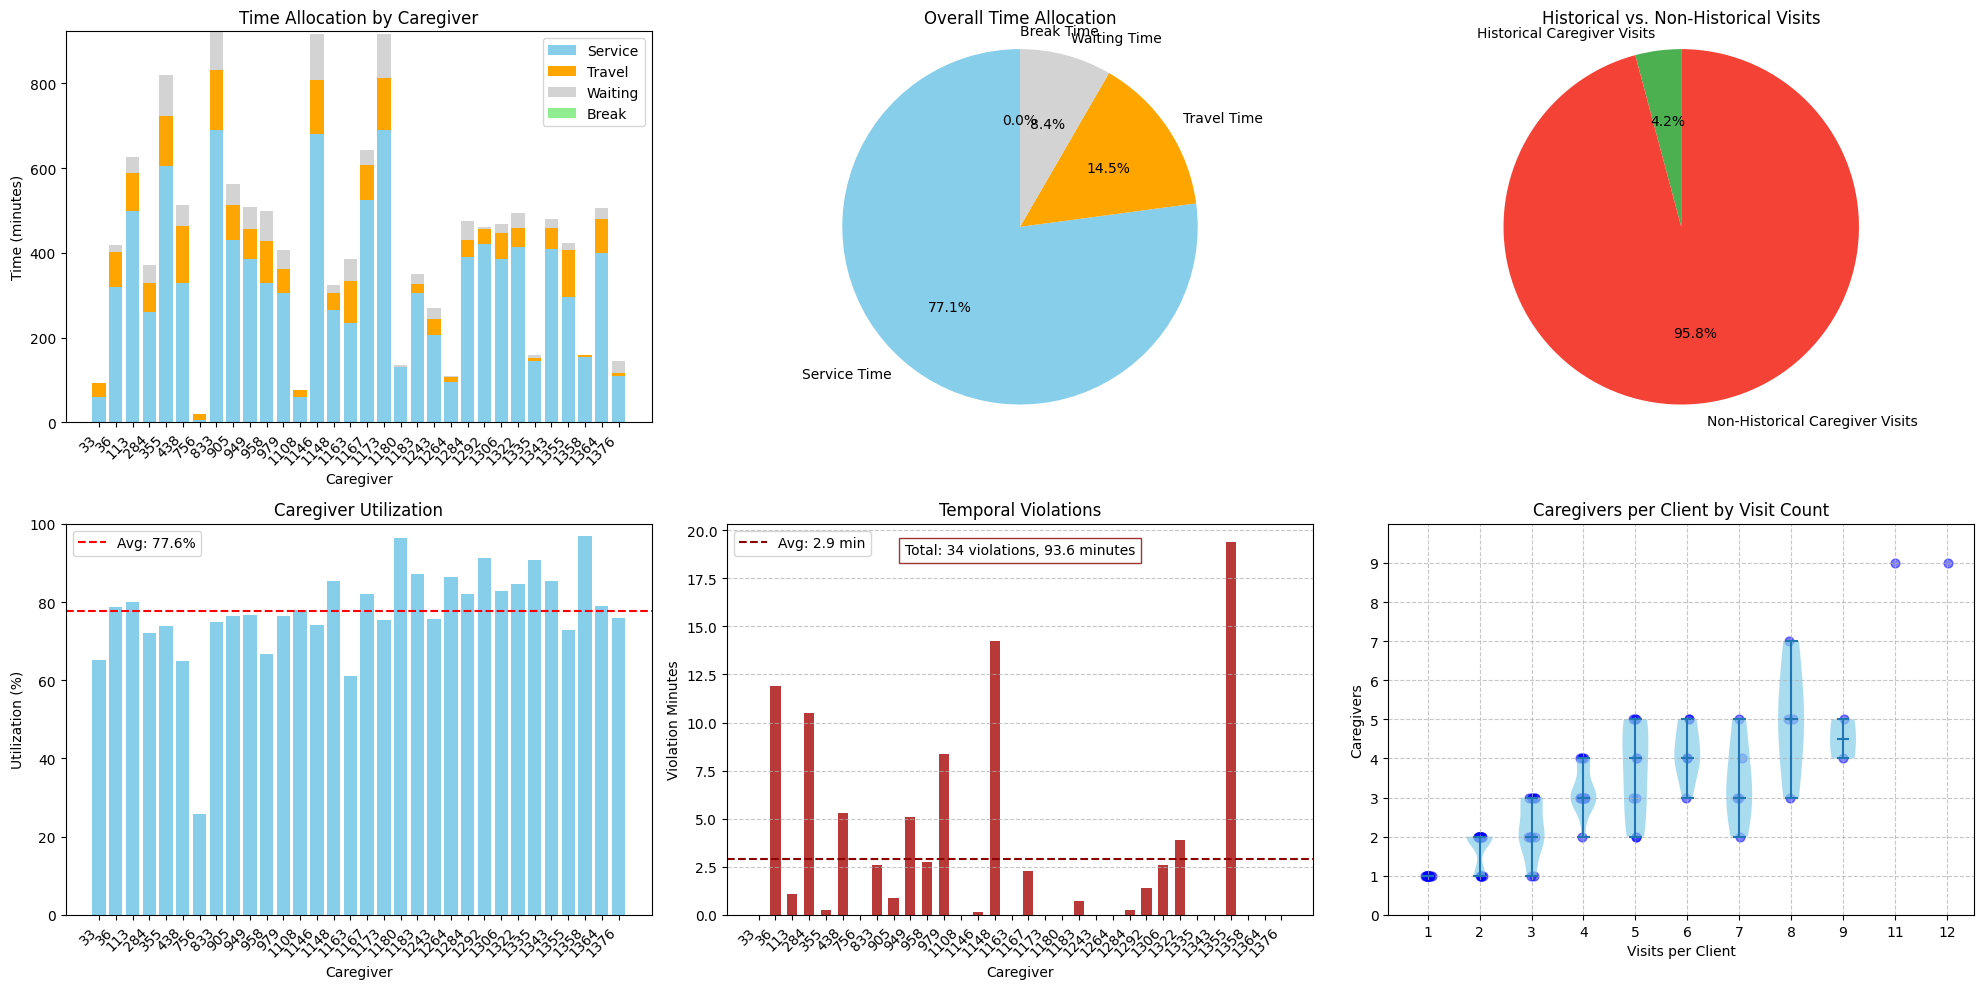

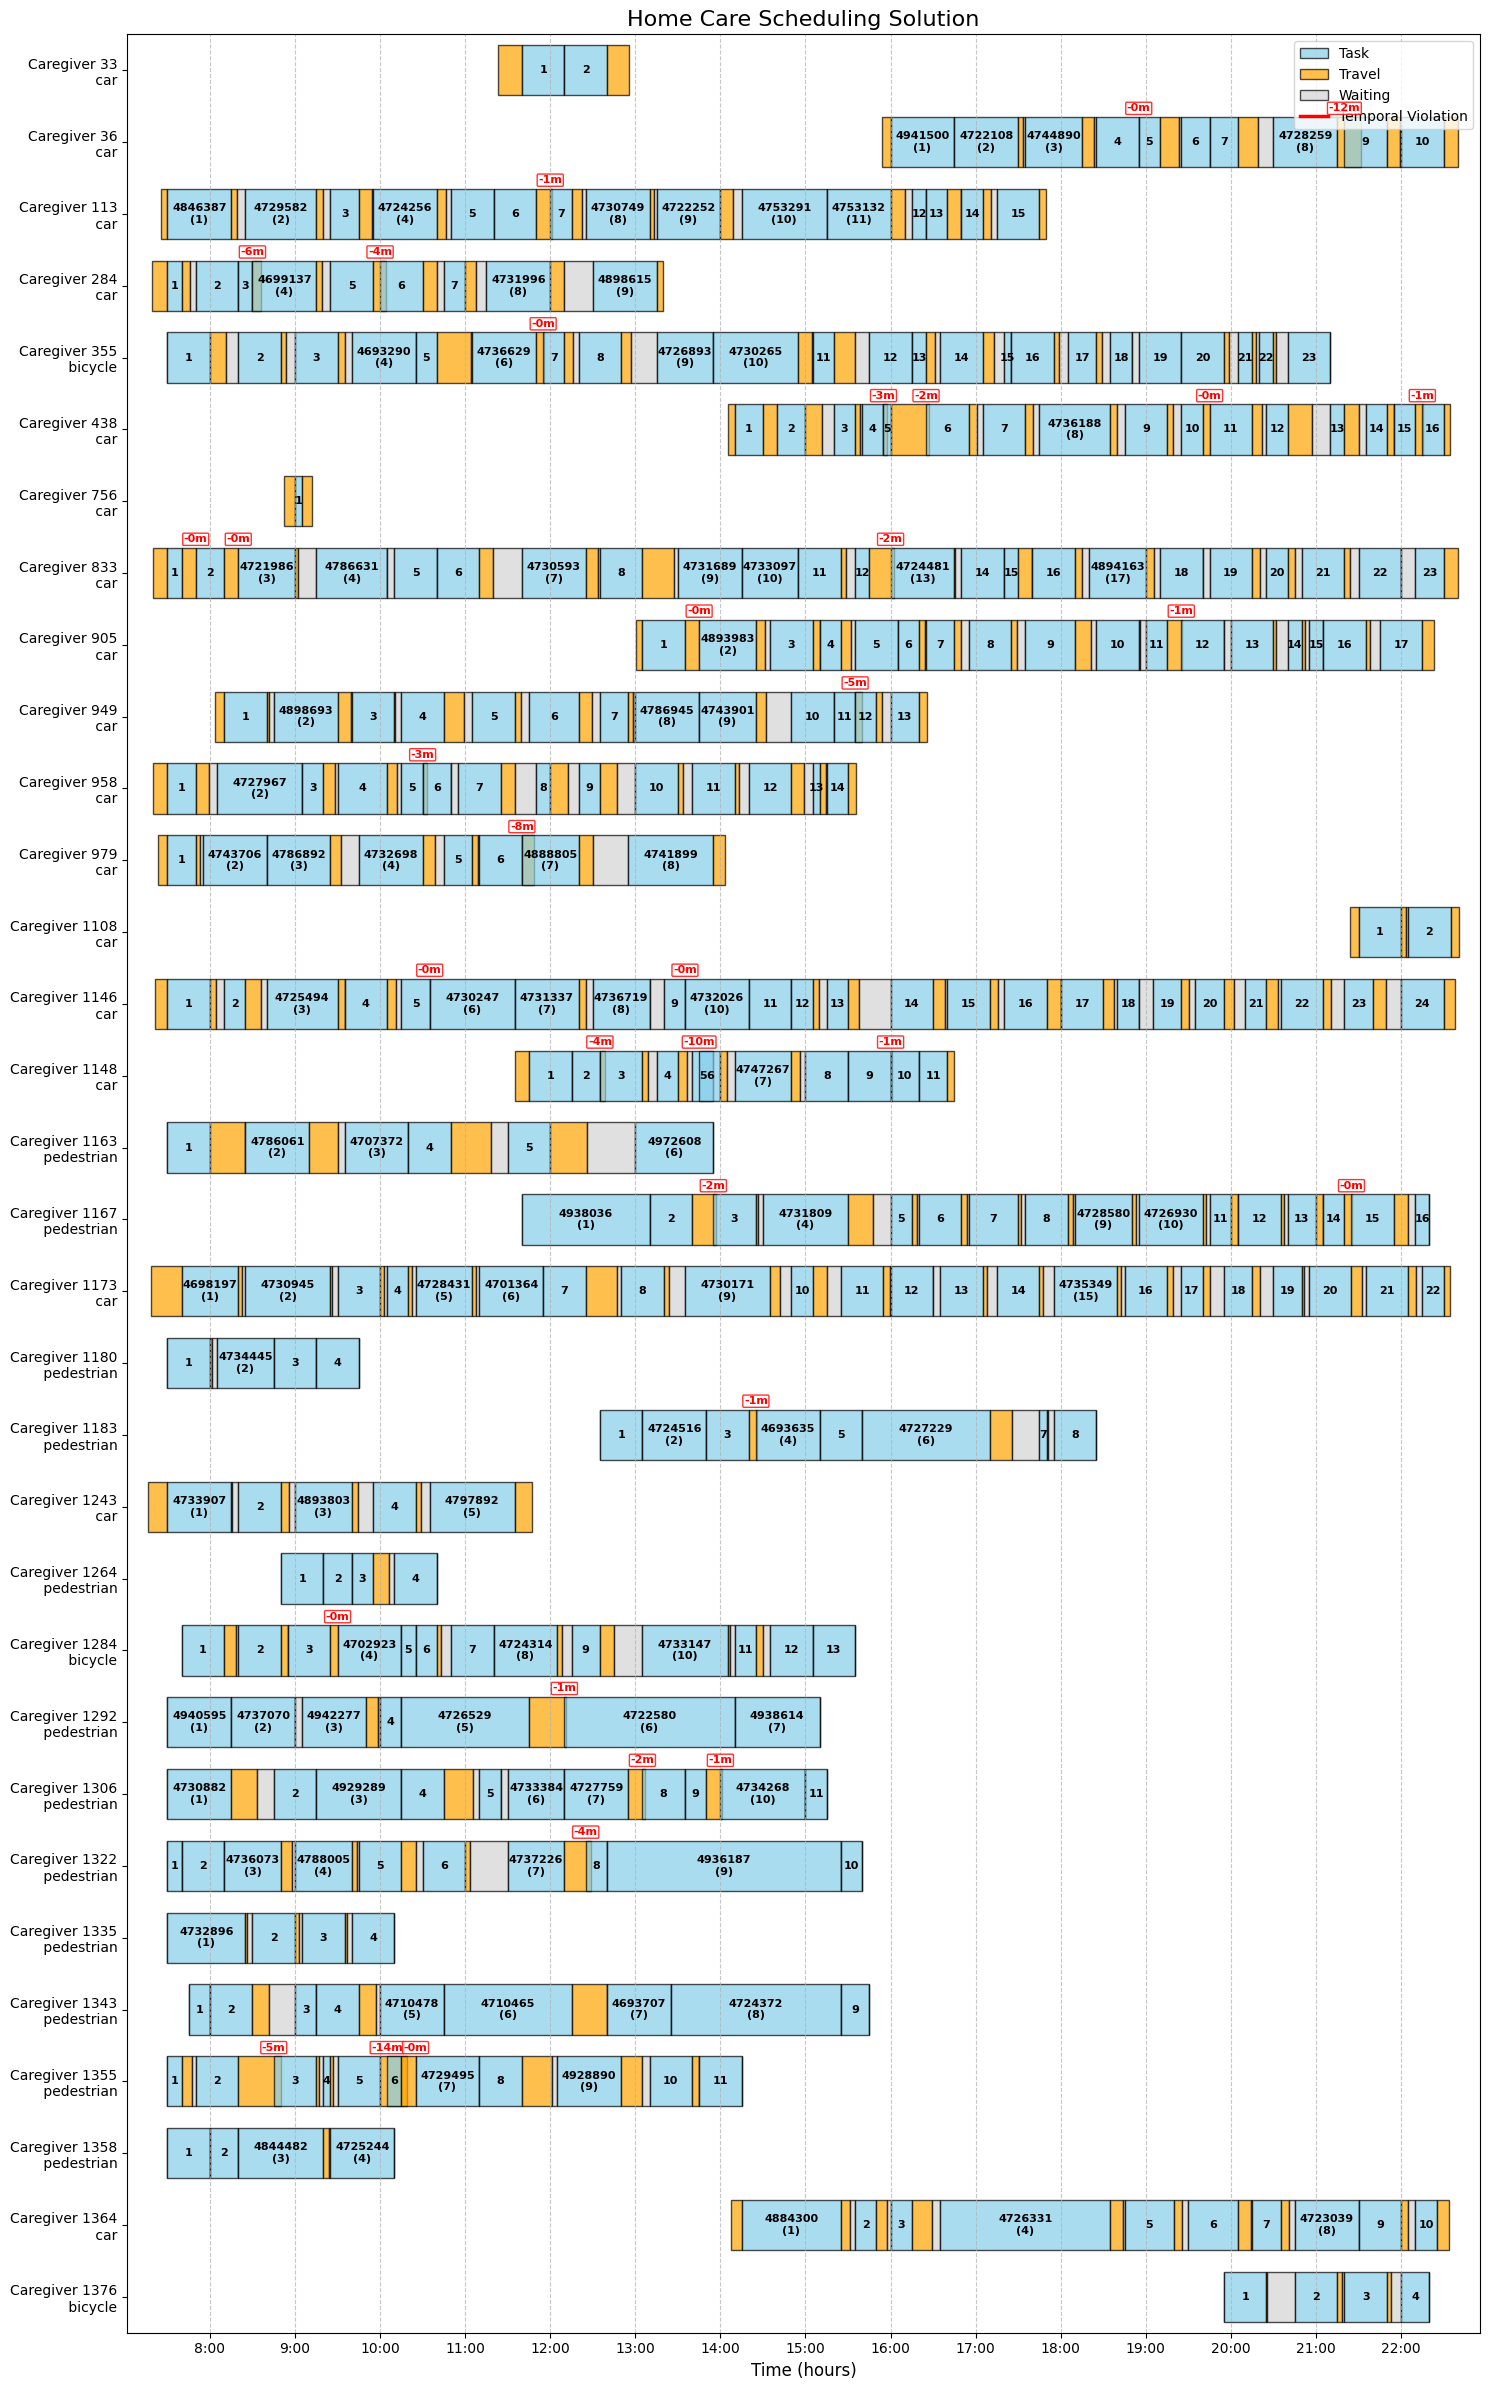

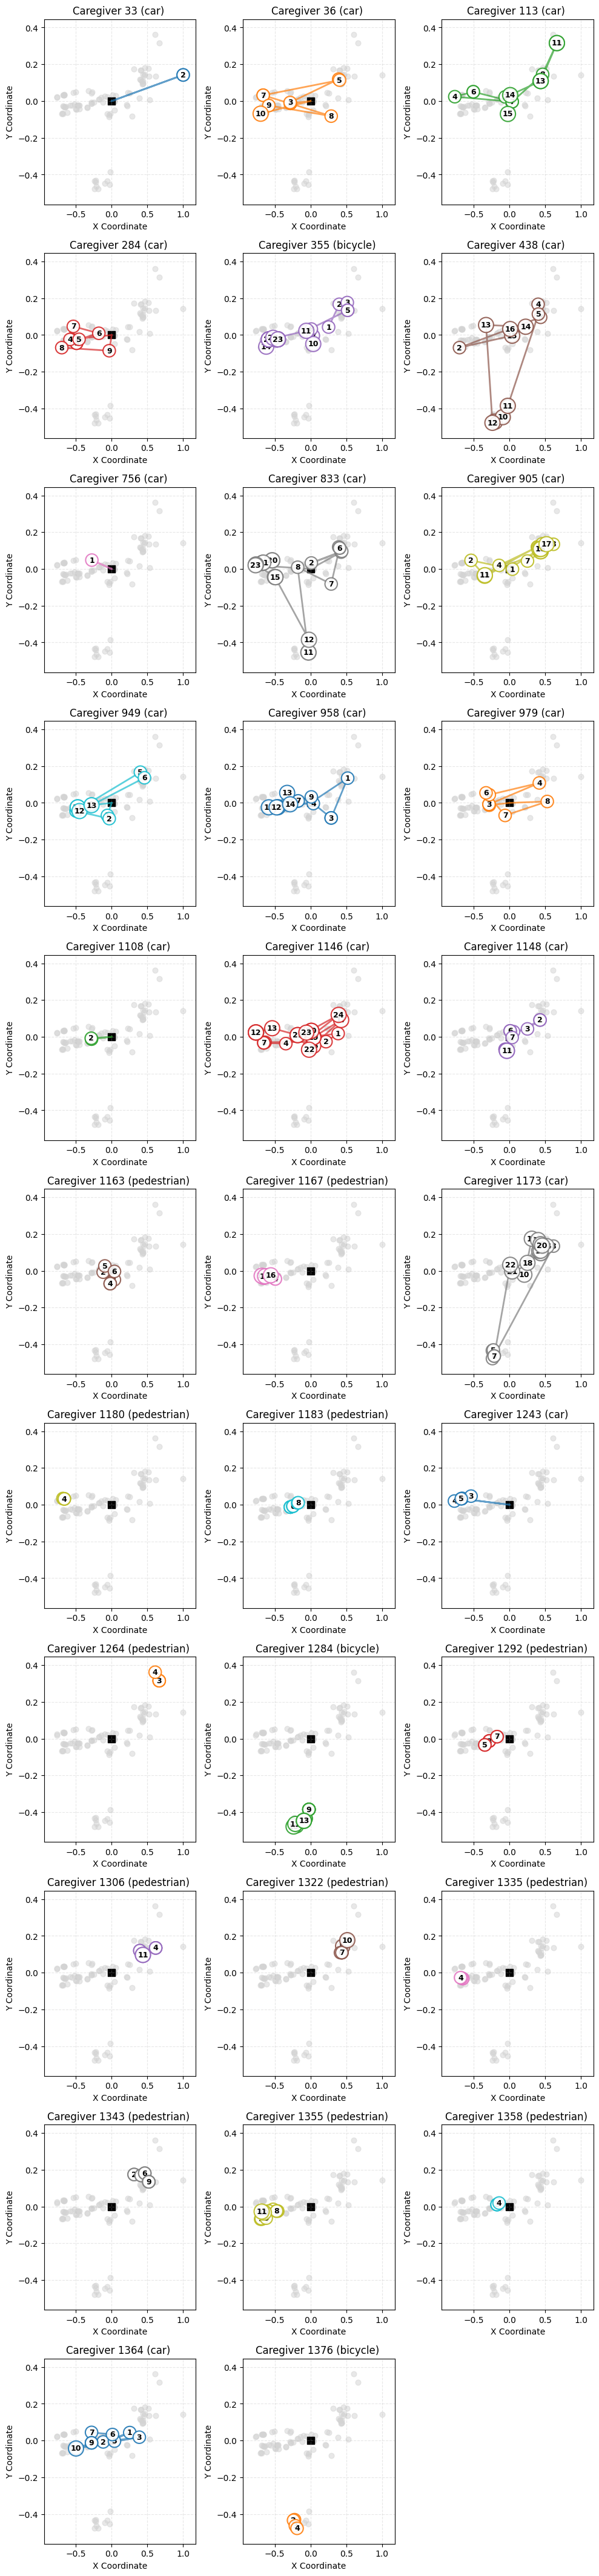

In [10]:
from utils.visualization import visualize_schedule, visualize_metrics, visualize_routes, display_metrics_summary

model.get_solution()

visualize_metrics(model, display_mode='dashboard');
visualize_schedule(model);
visualize_routes(model, caregiver_ids=None, subplot_mode=True);
#display_metrics_summary(model)

In [35]:
from utils.solution_storage import save_solution
save_solution(model, 'full_test_first_draft')

Solution saved to data/saved_solutions/20250331_081731_full_test_first_draft.json


'data/saved_solutions/20250331_081731_full_test_first_draft.json'

  Total time: 580.00, Accounted time: 593.62
  Service: 515.00, Travel: 24.80, Waiting: 53.82, Break: 0.00
  Total time: 917.55, Accounted time: 923.10
  Service: 640.00, Travel: 130.27, Waiting: 152.83, Break: 0.00
  Total time: 406.97, Accounted time: 408.60
  Service: 340.00, Travel: 50.32, Waiting: 18.28, Break: 0.00
  Total time: 550.00, Accounted time: 682.43
  Service: 385.00, Travel: 258.57, Waiting: 38.87, Break: 0.00
  Total time: 375.00, Accounted time: 387.65
  Service: 305.00, Travel: 68.57, Waiting: 14.08, Break: 0.00
  Total time: 530.00, Accounted time: 555.10
  Service: 475.00, Travel: 59.30, Waiting: 20.80, Break: 0.00
  Total time: 490.00, Accounted time: 508.35
  Service: 420.00, Travel: 61.42, Waiting: 26.93, Break: 0.00
  Total time: 510.00, Accounted time: 513.83
  Service: 425.00, Travel: 22.02, Waiting: 66.82, Break: 0.00
  Total time: 395.00, Accounted time: 558.97
  Service: 280.00, Travel: 271.58, Waiting: 7.38, Break: 0.00
  Total time: 400.00, Accounted ti

/Users/vilhelmkarlin/Code/KTH/SA120X_KEX/utils/visualization.py:795: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  dashboard_fig.show()


  Total time: 580.00, Accounted time: 593.62
  Service: 515.00, Travel: 24.80, Waiting: 53.82, Break: 0.00
  Total time: 917.55, Accounted time: 923.10
  Service: 640.00, Travel: 130.27, Waiting: 152.83, Break: 0.00
  Total time: 406.97, Accounted time: 408.60
  Service: 340.00, Travel: 50.32, Waiting: 18.28, Break: 0.00
  Total time: 550.00, Accounted time: 682.43
  Service: 385.00, Travel: 258.57, Waiting: 38.87, Break: 0.00
  Total time: 375.00, Accounted time: 387.65
  Service: 305.00, Travel: 68.57, Waiting: 14.08, Break: 0.00
  Total time: 530.00, Accounted time: 555.10
  Service: 475.00, Travel: 59.30, Waiting: 20.80, Break: 0.00
  Total time: 490.00, Accounted time: 508.35
  Service: 420.00, Travel: 61.42, Waiting: 26.93, Break: 0.00
  Total time: 510.00, Accounted time: 513.83
  Service: 425.00, Travel: 22.02, Waiting: 66.82, Break: 0.00
  Total time: 395.00, Accounted time: 558.97
  Service: 280.00, Travel: 271.58, Waiting: 7.38, Break: 0.00
  Total time: 400.00, Accounted ti

(<Figure size 1000x4266.67 with 33 Axes>,
 (<Figure size 1000x4266.67 with 33 Axes>,
  array([<Axes: title={'center': 'Caregiver 33 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 36 (car)  (No Route)'}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 113 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 284 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 355 (bicycle) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 438 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 756 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 833 (car) '}, xlabel='X Coordinate', ylabel='Y Coordinate'>,
         <Axes: title={'center': 'Caregiver 905 (car) '}, xlab

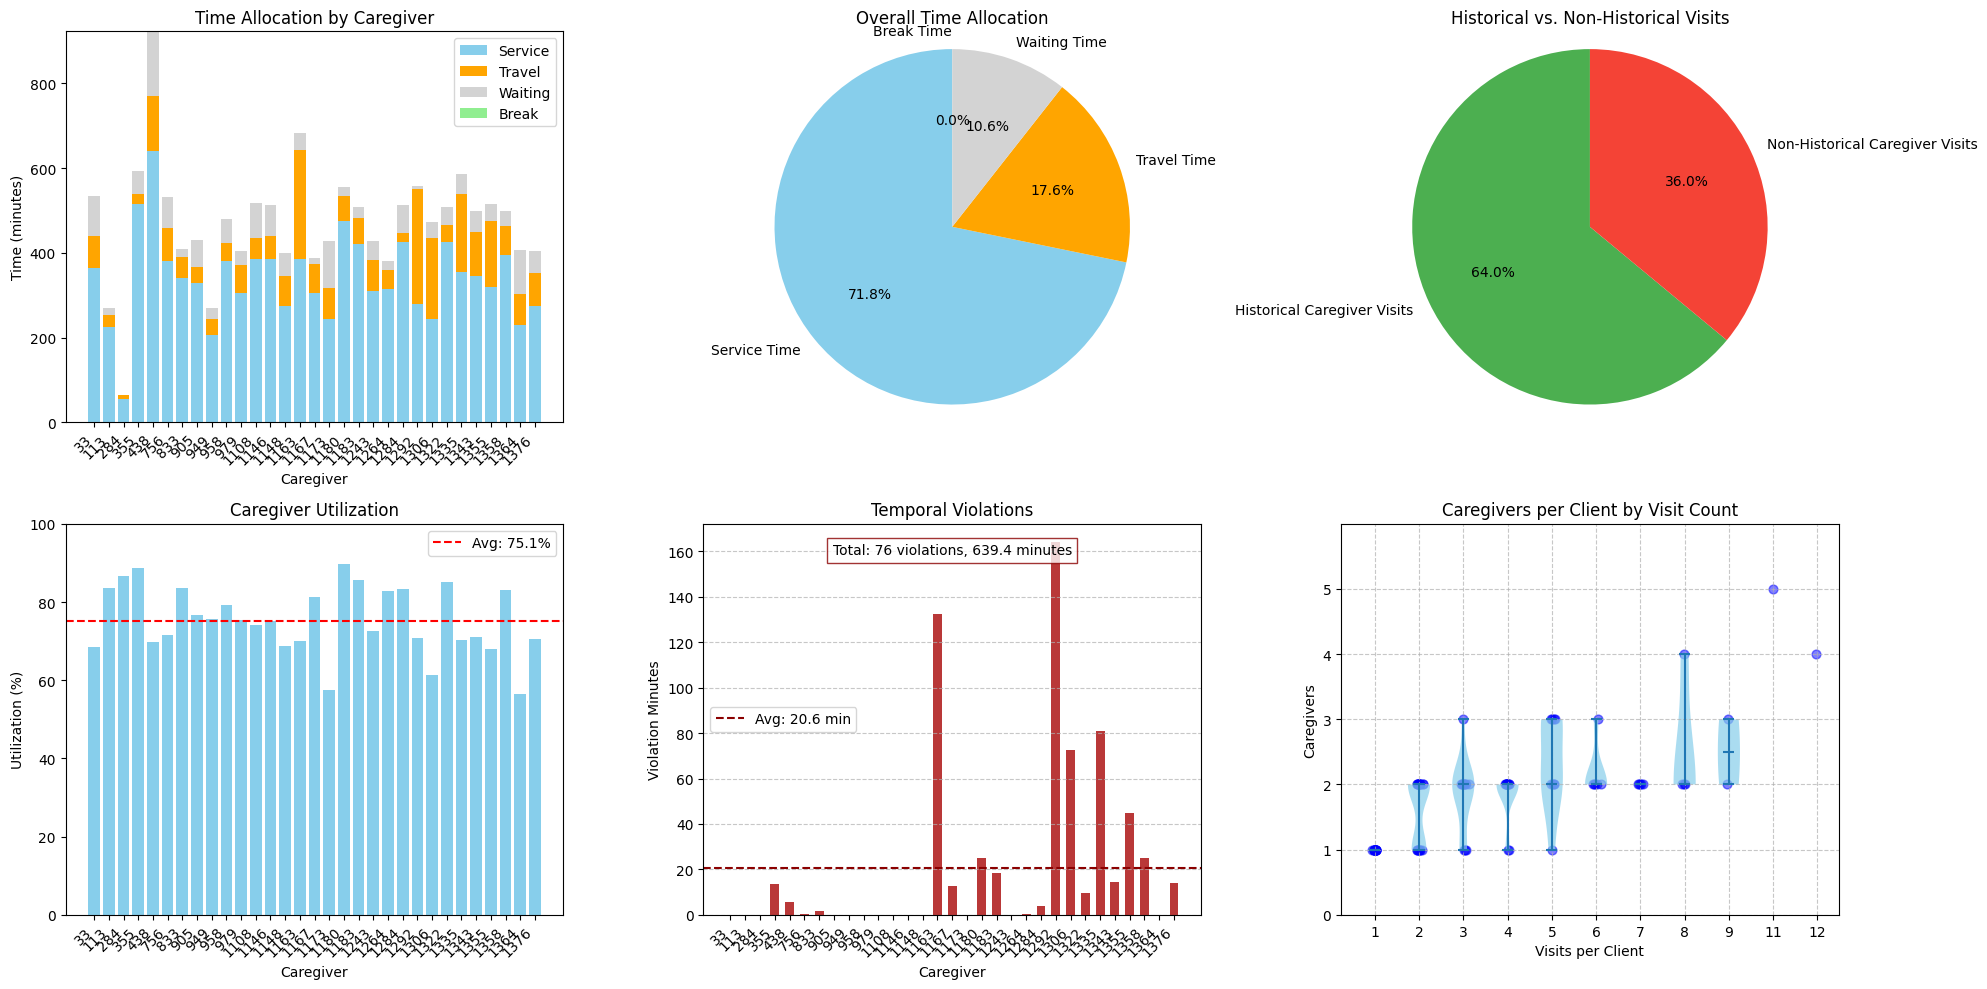

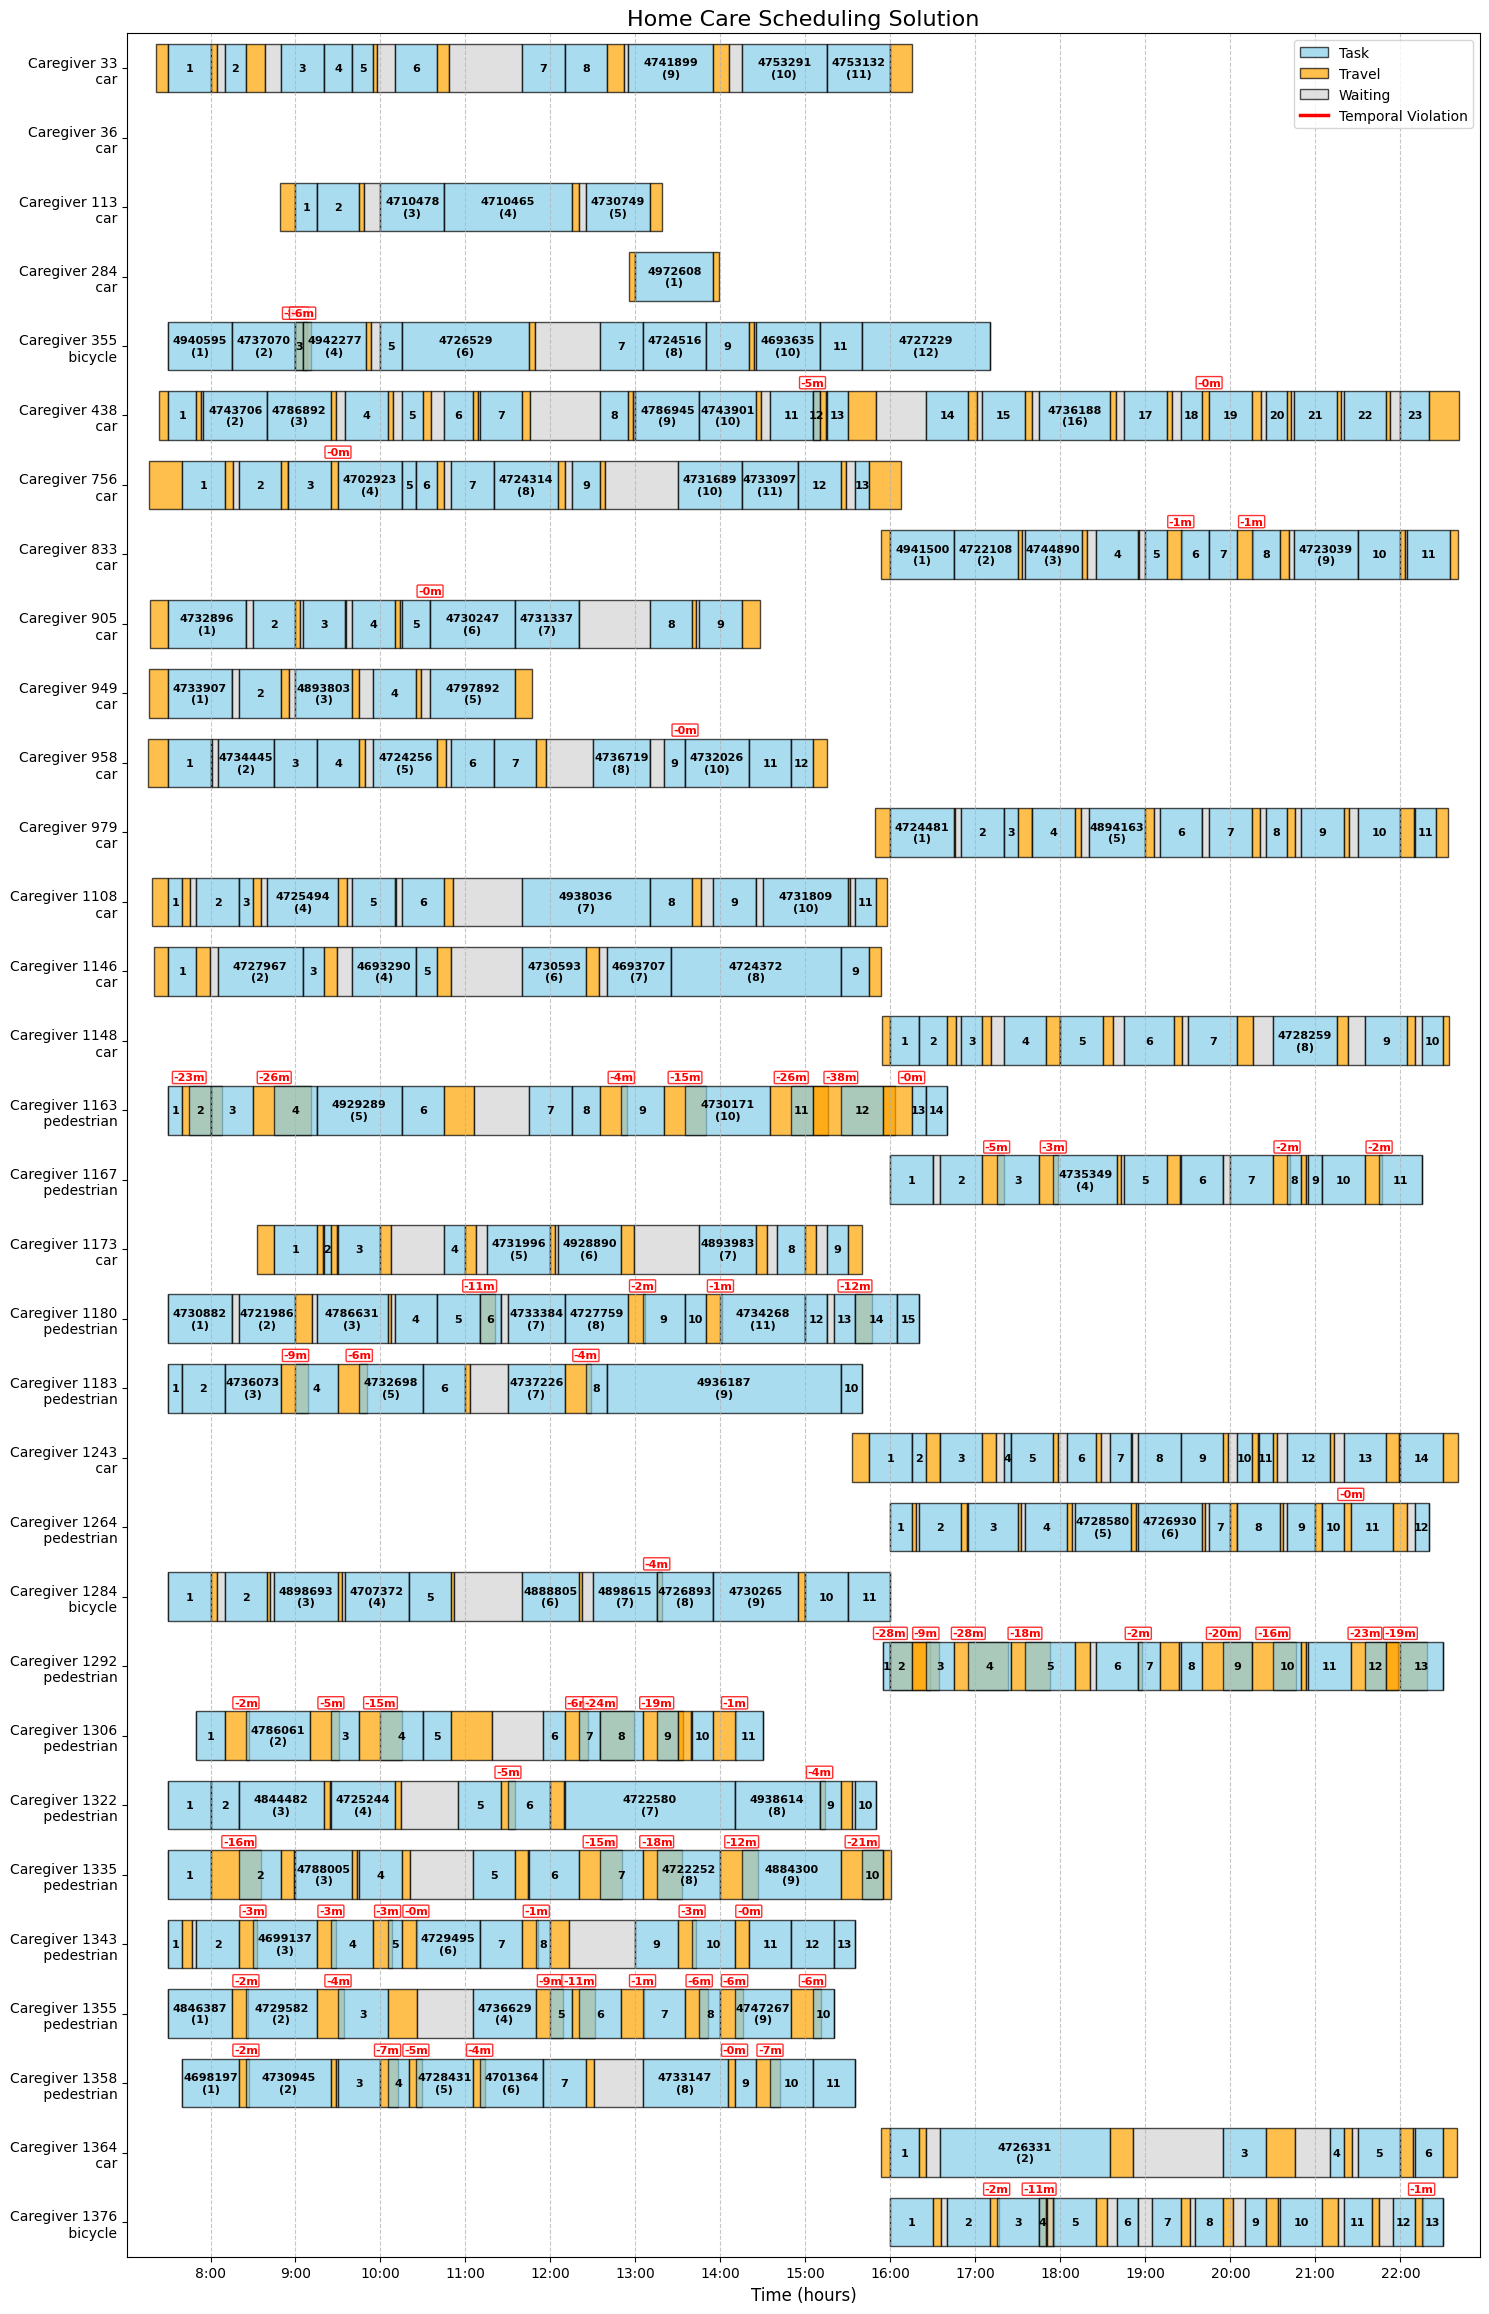

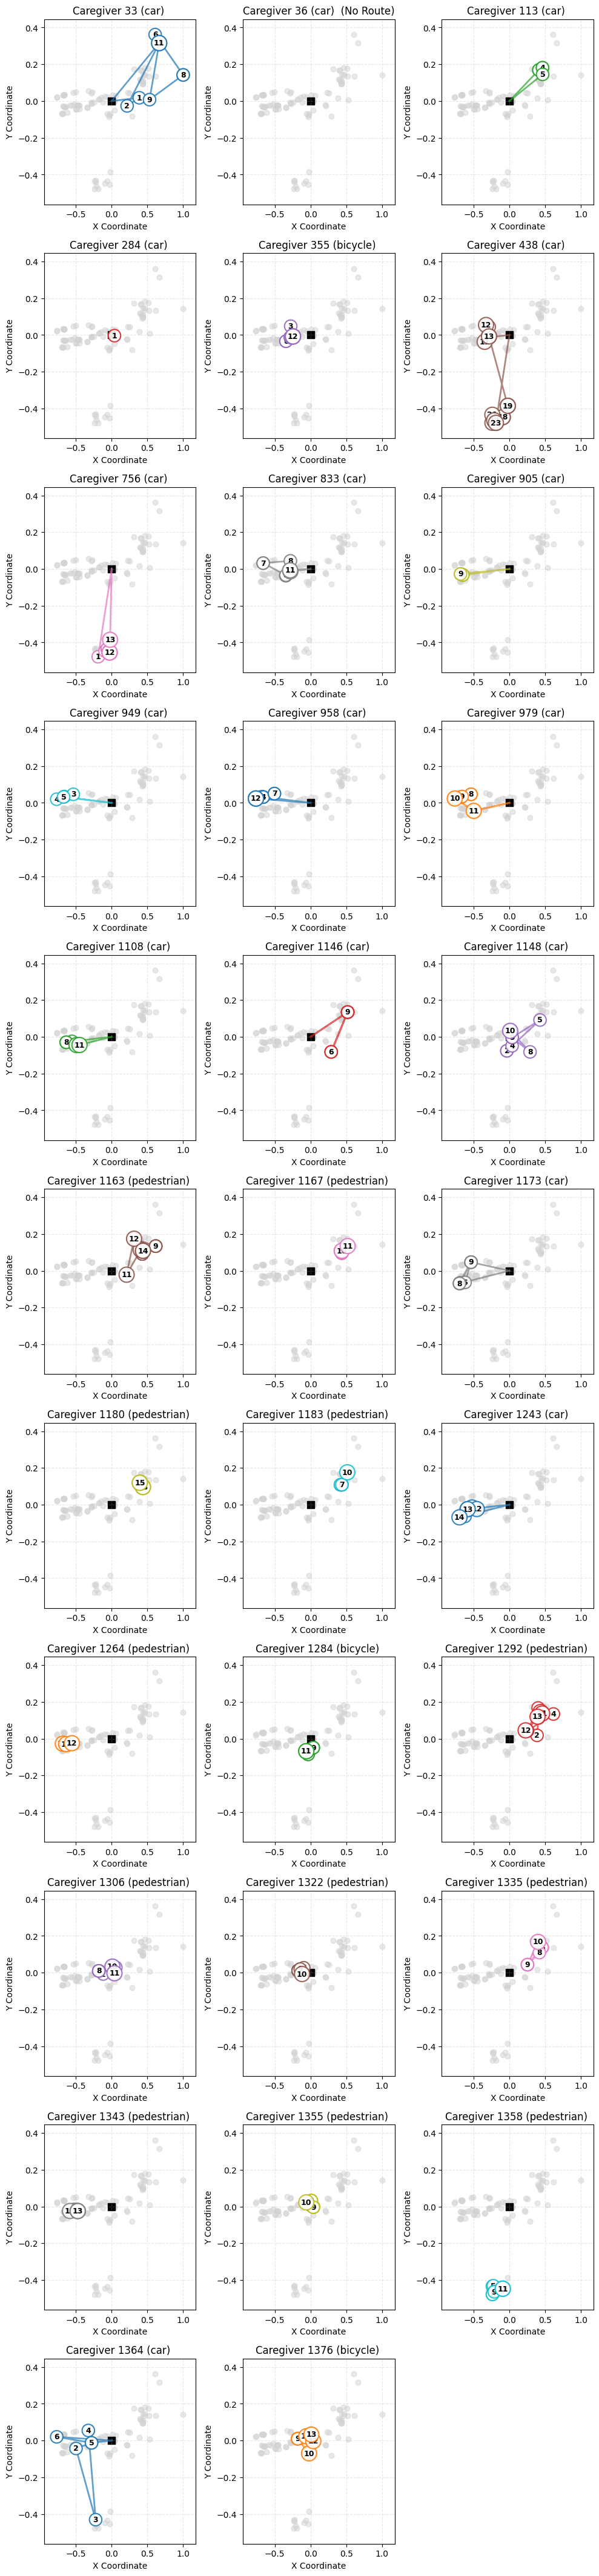

In [38]:
from utils.solution_storage import create_model_from_real_data

real_data_model = create_model_from_real_data(model.caregivers, model.tasks, model.clients, model.drive_time_matrix, model.walk_time_matrix, model.bicycle_time_matrix, model.continuity)

# display_metrics_summary(real_data_model)
visualize_metrics(real_data_model, display_mode='dashboard')
visualize_schedule(real_data_model)
visualize_routes(real_data_model, caregiver_ids=None, subplot_mode=True)
